In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
#plt.rcParams["font.family"] = "arial"
plt.rcParams["figure.figsize"] = [5,5]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300

%matplotlib inline

In [4]:
# load sparse matrix:
X = io.mmread("counts.mtx")

# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr()
)

In [5]:
# load cell metadata:
cell_meta = pd.read_csv("metadata.csv")

# load gene names:
with open("gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [6]:
# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

In [7]:
adata.obs

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,cell_type,UMAP_1,UMAP_2,barcode
barcode,,,,,,,,,,,,,,
ACCACGATGAACGCTTGTTCATGG_3,ACCACGATGAACGCTTGTTCATGG_3,Tet2mut_Veh,402,352,5.600000,14.000000,2424,999,6,6,HSC2,-0.124427,-1.558100,ACCACGATGAACGCTTGTTCATGG_3
ACTCCATCAGGAGGAAAGGATGGT_3,ACTCCATCAGGAGGAAAGGATGGT_3,Tet2mut_Veh,385,317,6.600000,16.400000,2420,1003,6,6,HSC2,0.227179,-4.109934,ACTCCATCAGGAGGAAAGGATGGT_3
AGAACGAGAAGGACACGTCTAGGT_3,AGAACGAGAAGGACACGTCTAGGT_3,Tet2mut_Veh,405,353,6.200000,12.600000,2418,1005,1,1,MEP,-1.518546,-1.703528,AGAACGAGAAGGACACGTCTAGGT_3
CCGTAAGAAGTCTGTGAGGCATAG_3,CCGTAAGAAGTCTGTGAGGCATAG_3,Tet2mut_Veh,386,337,7.600000,15.200000,2410,1006,1,1,MEP,-0.871045,-1.166330,CCGTAAGAAGTCTGTGAGGCATAG_3
GATTACCGCTCATTGCTGCGTAGA_3,GATTACCGCTCATTGCTGCGTAGA_3,Tet2mut_Veh,380,321,5.200000,18.800000,2393,992,6,6,HSC2,0.215499,-1.525710,GATTACCGCTCATTGCTGCGTAGA_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATATGCGCAATGGACGTGTCCAGA_3,ATATGCGCAATGGACGTGTCCAGA_3,Tet2mut_Veh,17237,4633,6.590069,17.511886,3771,2071,4,4,Pro_NE,1.697090,-6.316693,ATATGCGCAATGGACGTGTCCAGA_3
GAGACGATGAAGAGGTTTCAGCCT_3,GAGACGATGAAGAGGTTTCAGCCT_3,Tet2mut_Veh,16839,4634,7.121973,19.389046,4079,2265,16,16,ErP,-12.513557,1.276490,GAGACGATGAAGAGGTTTCAGCCT_3
GCTATCCTTCCGTATGTGGTCCTT_3,GCTATCCTTCCGTATGTGGTCCTT_3,Tet2mut_Veh,17267,4857,7.699137,19.288009,3806,2236,4,4,Pro_NE,0.662285,-7.073691,GCTATCCTTCCGTATGTGGTCCTT_3


In [8]:
# load dimensional reduction:
pca = pd.read_csv("pca.csv")
pca.index = adata.obs.index

In [9]:
# set pca and umap
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

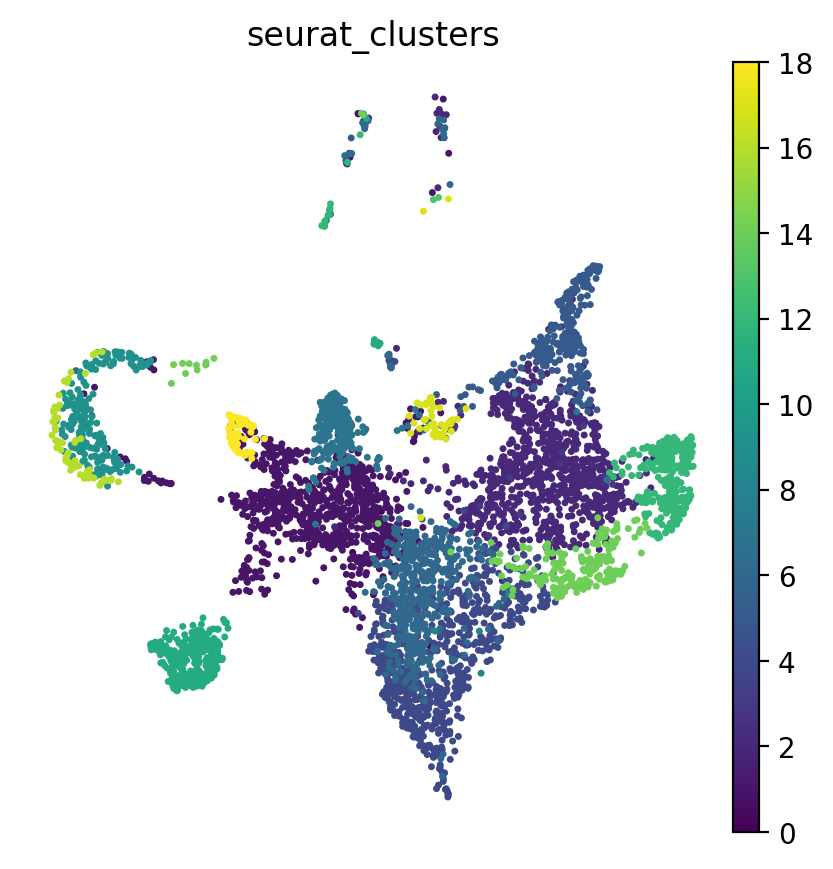

In [10]:
# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata, color=['seurat_clusters'], frameon=False, save=True)

In [11]:
# save dataset as anndata format
adata.write('Tet2_Veh_ADRB_IL1R.h5ad')

In [12]:
#plt.rcParams["font.family"] = "arial"
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [4,4]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 600

%matplotlib inline

/disk1/cai003/miniconda3/envs/TOSICA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


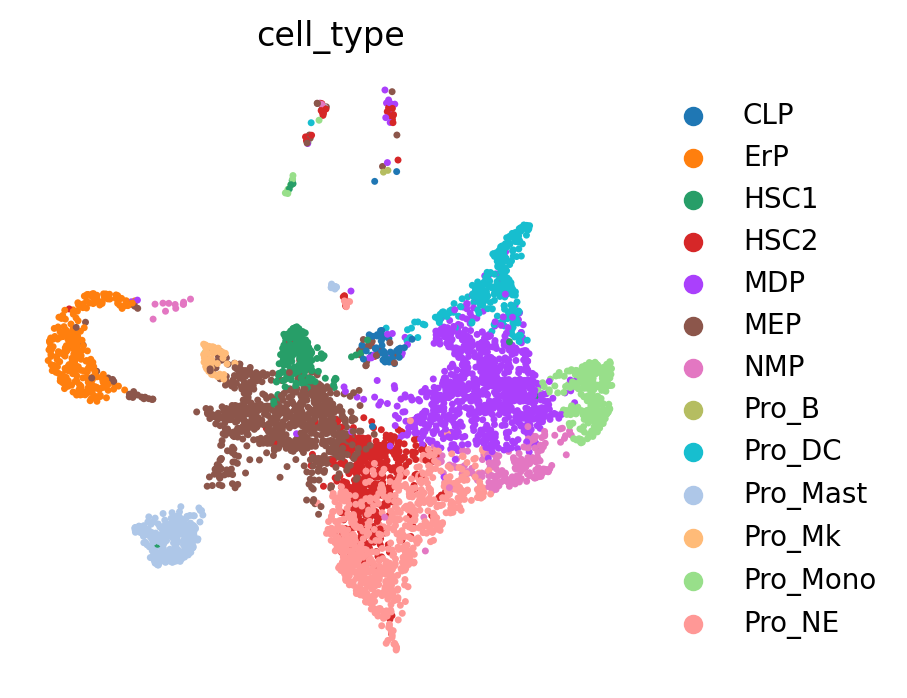

In [13]:
# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata, color=['cell_type'], frameon=False, save=False)

In [14]:
import TOSICA
import scanpy as sc
import numpy as np
import warnings 
warnings.filterwarnings ("ignore")

In [15]:
import torch
print(torch.__version__)
print(torch.cuda.get_device_capability(device=None),  torch.cuda.get_device_name(device=None))

1.7.1
(8, 9) NVIDIA GeForce RTX 4090


In [16]:
import os
os.getcwd()

'/disk1/cai003/TOSICA_GRN_GOBP/pathway/ADRB_IL1R'

In [17]:
%%time
ref_adata = sc.read('/disk1/cai015/rename_h5ad/rename_WT_BM_scVelo.h5ad')
ref_adata = ref_adata[:,ref_adata.var_names]
print(ref_adata)
print(ref_adata.obs.cell_type.value_counts())

View of AnnData object with n_obs × n_vars = 7266 × 30065
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'cell_type', 'barcode', 'UMAP_1', 'UMAP_2', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'cell_type_colors', 'neighbors', 'orig.ident_colors', 'seurat_clusters_colors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'
cell_type
Pro_B       1226
MDP         1221
Pro_NE       930
ErP          853
Pro_DC       805
MEP          679
HSC2         481
NMP          248
CLP    

In [18]:
from collections import OrderedDict
def read_gmt(fname, sep='\t', min_g=0, max_g=5000):
    """
    Read GMT file into dictionary of gene_module:genes.\n
    min_g and max_g are optional gene set size filters.

    Args:
        fname (str): Path to gmt file
        sep (str): Separator used to read gmt file.
        min_g (int): Minimum of gene members in gene module.
        max_g (int): Maximum of gene members in gene module.
    Returns:
        OrderedDict: Dictionary of gene_module:genes.
    """
    dict_pathway = OrderedDict()
    with open(fname) as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            val = line.split(sep)
            if min_g <= len(val[2:]) <= max_g:
                dict_pathway[val[0]] = val[2:]
    return dict_pathway

In [19]:
mouse_gobp = read_gmt(fname="/disk1/cai003/TOSICA/TOSICA/resources/m_GO_bp.gmt")

In [20]:
import pandas as pd
mouse_gobp = read_gmt(fname="/disk1/cai003/TOSICA/TOSICA/resources/m_reactome.gmt")
df_my_dict = pd.DataFrame.from_dict(mouse_gobp, orient='index')
#df_my_dict.to_csv("mouse_reactome.csv")
df_my_dict

,0,1,2,3,4,5,6,7,8,9,...,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791
REACTOME_INTERLEUKIN_6_SIGNALING,Stat3,Il6st,Jak2,Il6,Tyk2,Cbl,Ptpn11,Socs3,None,None,...,None,None,None,None,None,None,None,None,None,None
REACTOME_APOPTOSIS,Fasl,Kpnb1,Bcap31,Aven,Bax,Bid,Apc,Ctnnb1,Bcl2l1,Dynll1,...,None,None,None,None,None,None,None,None,None,None
REACTOME_HEMOSTASIS,Gnai3,Apoh,Gna12,Dgke,Itgb2,Lck,Raf1,Pdgfb,Itga5,Vpreb3,...,None,None,None,None,None,None,None,None,None,None
REACTOME_INTRINSIC_PATHWAY_FOR_APOPTOSIS,Aven,Bax,Bid,Bcl2l1,Dynll1,Apip,Gzmb,Ywhab,Ywhah,Apaf1,...,None,None,None,None,None,None,None,None,None,None
REACTOME_MAPK3_ERK1_ACTIVATION,Map2k1,Cdk1,Il6st,Jak2,Il6,Tyk2,Ptpn11,Mapk3,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REACTOME_KINESINS,Tubb6,Klc4,Kif20a,Kifc2,Kif5b,Kif19a,Kif11,Kif1a,Tubb1,Kif3a,...,None,None,None,None,None,None,None,None,None,None
REACTOME_FACTORS_INVOLVED_IN_MEGAKARYOCYTE_DEVELOPMENT_AND_PLATELET_PRODUCTION,Tubb6,Rac1,Prkar2b,Klc4,Kif20a,Kifc2,Prkacb,Sh2b2,Prkaca,Gata6,...,None,None,None,None,None,None,None,None,None,None
REACTOME_ANTIGEN_ACTIVATES_B_CELL_RECEPTOR_BCR_LEADING_TO_GENERATION_OF_SECOND_MESSENGERS,Cd79a,Ptpn6,Syk,Sos1,Pik3ap1,Dapp1,Itpr1,Itpr2,Cd22,Cd19,...,None,None,None,None,None,None,None,None,None,None
REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR,Calm1,Psmc3,Cd79a,Ikbkg,Ptpn6,Psmd4,Psmb4,Psmd2,Ubc,Psmb1,...,None,None,None,None,None,None,None,None,None,None


In [21]:
df_my_dict.to_csv("mouse_gobp.csv")

In [22]:
%%time
query_adata = sc.read('/disk1/cai003/TOSICA_GRN_GOBP/pathway/ADRB_IL1R/Tet2_Veh_ADRB_IL1R.h5ad')
# Tet2_BM_scVelo.h5ad
# WTDSS_BM_scVelo.h5ad
# query_adata = sc.read('/disk1/cai015/from_cai026/TET2_DSS_dynamo/out_files_TET2/Tet2_BM_scVelo.h5ad')
# query_adata = sc.read('/disk1/cai015/from_cai026/TET2_DSS_dynamo/out_files_WTDSS/WTDSS_BM_scVelo.h5ad')
# Tet2DSS_BM_scVelo.h5ad
# query_adata = sc.read('/disk1/cai015/from_cai026/TET2_DSS_dynamo/out_files_TET2DSS/Tet2DSS_BM_scVelo.h5ad')

query_adata = query_adata[:,ref_adata.var_names]
print(query_adata)
print(query_adata.obs.cell_type.value_counts())

View of AnnData object with n_obs × n_vars = 4793 × 30065
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'cell_type', 'UMAP_1', 'UMAP_2', 'barcode'
    obsm: 'X_pca', 'X_umap'
cell_type
MDP         910
MEP         908
Pro_NE      748
HSC2        490
Pro_Mast    356
Pro_Mono    296
ErP         271
Pro_DC      256
HSC1        243
NMP         208
Pro_Mk       58
CLP          47
Pro_B         2
Name: count, dtype: int64
CPU times: user 29.4 ms, sys: 28.5 ms, total: 57.9 ms
Wall time: 57.3 ms


In [23]:
print(query_adata)
print(query_adata.obs.cell_type.value_counts())

View of AnnData object with n_obs × n_vars = 4793 × 30065
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'cell_type', 'UMAP_1', 'UMAP_2', 'barcode'
    obsm: 'X_pca', 'X_umap'
cell_type
MDP         910
MEP         908
Pro_NE      748
HSC2        490
Pro_Mast    356
Pro_Mono    296
ErP         271
Pro_DC      256
HSC1        243
NMP         208
Pro_Mk       58
CLP          47
Pro_B         2
Name: count, dtype: int64


In [24]:
#plt.rcParams["font.family"] = "arial"
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [4,4]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 600

%matplotlib inline

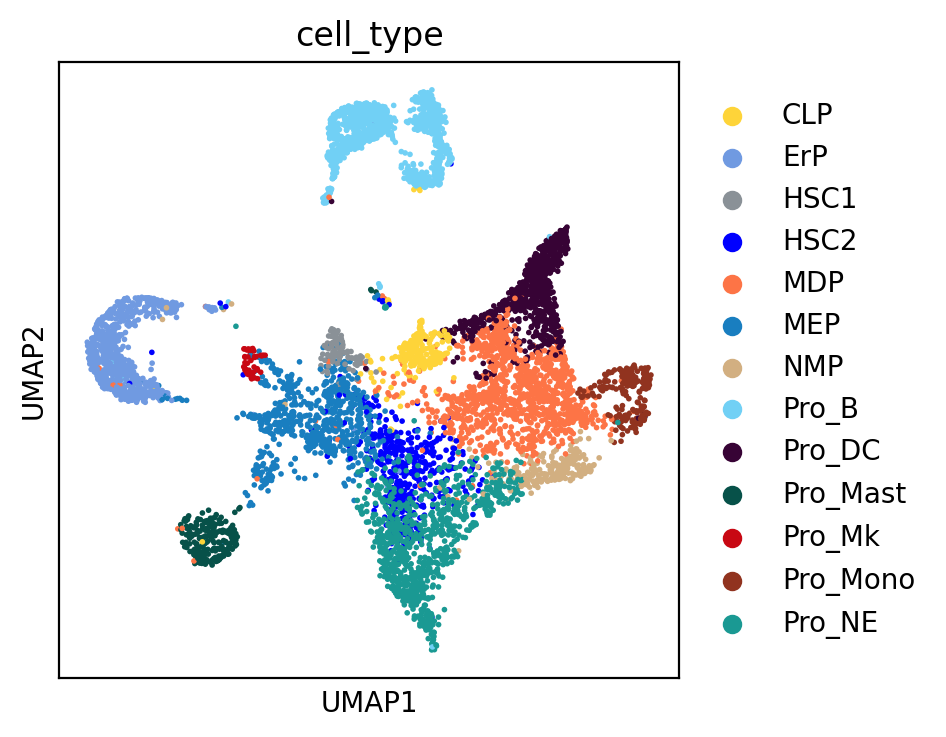

In [25]:
sc.pl.umap(ref_adata, color=['cell_type'])

In [26]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

In [27]:
%%time
# max_g=300,max_gs=300
# mouse_gobp
TOSICA.train(ref_adata, gmt_path='mouse_gobp', label_name='cell_type', epochs=5, 
             max_g=300, max_gs=300,
             project='Hehang_DSS_mouse_gobp_test21')

cuda:0
Mask loaded!
Model builded!


[valid epoch 4] loss: 0.327, acc: 0.916: 100%|██████████████████████████████████| 597/597 [00:09<00:00, 62.94it/s]


Training finished!
CPU times: user 13min 56s, sys: 39.3 s, total: 14min 35s
Wall time: 15min 25s


In [32]:
%%time
model_weight_path = './Hehang_DSS_mouse_gobp_test21/model-4.pth'
new_adata = TOSICA.pre(query_adata, model_weight_path = model_weight_path, batch_size = 500, project='Hehang_DSS_mouse_gobp_test21')

cuda:0
cls_token : torch.Size([1, 1, 48])
feature_embed.fe.mask : torch.Size([14400, 30065])
feature_embed.fe.weight : torch.Size([14400, 30065])
feature_embed.fe.bias : torch.Size([14400])
blocks.0.norm1.weight : torch.Size([48])
blocks.0.norm1.bias : torch.Size([48])
blocks.0.attn.qkv.weight : torch.Size([144, 48])
blocks.0.attn.qkv.bias : torch.Size([144])
blocks.0.attn.proj.weight : torch.Size([48, 48])
blocks.0.attn.proj.bias : torch.Size([48])
blocks.0.norm2.weight : torch.Size([48])
blocks.0.norm2.bias : torch.Size([48])
blocks.0.mlp.fc1.weight : torch.Size([192, 48])
blocks.0.mlp.fc1.bias : torch.Size([192])
blocks.0.mlp.fc2.weight : torch.Size([48, 192])
blocks.0.mlp.fc2.bias : torch.Size([48])
blocks.1.norm1.weight : torch.Size([48])
blocks.1.norm1.bias : torch.Size([48])
blocks.1.attn.qkv.weight : torch.Size([144, 48])
blocks.1.attn.qkv.bias : torch.Size([144])
blocks.1.attn.proj.weight : torch.Size([48, 48])
blocks.1.attn.proj.bias : torch.Size([48])
blocks.1.norm2.weight :

In [33]:
pre0 = torch.load("./0Pre_tensor.pt")
pre1 = torch.load("./1Pre_tensor.pt")
pre2 = torch.load("./2Pre_tensor.pt")
pre3 = torch.load("./3Pre_tensor.pt")
pre4 = torch.load("./4Pre_tensor.pt")
pre5 = torch.load("./5Pre_tensor.pt")
pre6 = torch.load("./6Pre_tensor.pt")
pre7 = torch.load("./7Pre_tensor.pt")
pre8 = torch.load("./8Pre_tensor.pt")
pre9 = torch.load("./9Pre_tensor.pt")

In [34]:
import pandas as pd
df0 = pre0.numpy()
df0 = pd.DataFrame(df0)

df1 = pre1.numpy()
df1 = pd.DataFrame(df1)

df2 = pre2.numpy()
df2 = pd.DataFrame(df2)

df3 = pre3.numpy()
df3 = pd.DataFrame(df3)

df4 = pre4.numpy()
df4 = pd.DataFrame(df4)

df5 = pre5.numpy()
df5 = pd.DataFrame(df5)

df6 = pre6.numpy()
df6 = pd.DataFrame(df6)

df7 = pre7.numpy()
df7 = pd.DataFrame(df7)

df8 = pre8.numpy()
df8 = pd.DataFrame(df8)

df9 = pre9.numpy()
df9 = pd.DataFrame(df9)

In [35]:
df_preMatrix = pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9])
df_preMatrix.to_csv("TOSICA_PreMatrix_TET2_ADRB_IL1R.csv")
df_preMatrix

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.484452e-03,0.000224,2.946060e-04,0.279356,1.458637e-03,0.181865,8.080304e-04,1.660867e-07,5.564517e-06,5.235281e-01,2.715881e-06,1.342393e-07,0.007972
1,2.973427e-05,0.002014,4.205888e-05,0.778578,4.784161e-05,0.089229,1.267376e-03,1.811670e-08,1.237226e-07,2.645276e-02,1.144491e-04,3.113620e-07,0.102225
2,1.095526e-01,0.000138,3.445233e-03,0.044633,2.776862e-03,0.236972,1.043068e-04,2.896234e-06,5.222729e-05,6.019064e-01,4.458231e-07,7.892694e-08,0.000416
3,1.538300e-03,0.007283,5.588091e-03,0.141139,5.448390e-06,0.831804,5.955959e-06,3.482531e-07,1.521977e-07,1.139542e-02,1.204311e-05,1.056283e-08,0.001228
4,3.864449e-01,0.000081,8.287256e-03,0.011661,3.989021e-03,0.153305,4.245782e-05,1.426574e-05,1.947718e-04,4.358968e-01,2.067422e-07,9.532802e-08,0.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,7.821064e-08,0.000831,3.871362e-07,0.075892,6.082666e-05,0.000297,6.002790e-02,5.649193e-08,4.150348e-07,3.397615e-04,1.747637e-02,3.988140e-04,0.844675
289,2.787227e-06,0.938583,1.666841e-02,0.001312,2.504486e-09,0.016124,1.094898e-07,4.263615e-05,1.343735e-08,2.643776e-07,2.707223e-02,1.110076e-06,0.000194
290,6.518516e-08,0.001678,6.158639e-07,0.082121,3.025541e-05,0.000399,3.794015e-02,6.922347e-08,2.685629e-07,2.101172e-04,2.936124e-02,3.611821e-04,0.847898
291,2.691087e-06,0.936358,1.742986e-02,0.000984,2.504628e-09,0.012628,1.063434e-07,6.222560e-05,1.717031e-08,2.004032e-07,3.236685e-02,1.570438e-06,0.000166


In [36]:
df_meta = new_adata.obs
#df = df_meta.join(df_preMatrix)
df_meta.to_csv("TOSICA_PreMeta_TET2_ADRB_IL1R.csv")
df_meta

,Prediction,Probability,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,cell_type,UMAP_1,UMAP_2,barcode
barcode,,,,,,,,,,,,,,,,
ACCACGATGAACGCTTGTTCATGG_3,Pro_Mast,0.523528,ACCACGATGAACGCTTGTTCATGG_3,Tet2mut_Veh,402,352,5.6,14.0,2424,999,6,6,HSC2,-0.124427,-1.5581,ACCACGATGAACGCTTGTTCATGG_3
ACTCCATCAGGAGGAAAGGATGGT_3,HSC2,0.778578,ACTCCATCAGGAGGAAAGGATGGT_3,Tet2mut_Veh,385,317,6.6,16.4,2420,1003,6,6,HSC2,0.227179,-4.109934,ACTCCATCAGGAGGAAAGGATGGT_3
AGAACGAGAAGGACACGTCTAGGT_3,Pro_Mast,0.601906,AGAACGAGAAGGACACGTCTAGGT_3,Tet2mut_Veh,405,353,6.2,12.6,2418,1005,1,1,MEP,-1.518546,-1.703528,AGAACGAGAAGGACACGTCTAGGT_3
CCGTAAGAAGTCTGTGAGGCATAG_3,MEP,0.831804,CCGTAAGAAGTCTGTGAGGCATAG_3,Tet2mut_Veh,386,337,7.6,15.2,2410,1006,1,1,MEP,-0.871045,-1.16633,CCGTAAGAAGTCTGTGAGGCATAG_3
GATTACCGCTCATTGCTGCGTAGA_3,Pro_Mast,0.435897,GATTACCGCTCATTGCTGCGTAGA_3,Tet2mut_Veh,380,321,5.2,18.8,2393,992,6,6,HSC2,0.215499,-1.52571,GATTACCGCTCATTGCTGCGTAGA_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATATGCGCAATGGACGTGTCCAGA_3,Pro_NE,0.844675,ATATGCGCAATGGACGTGTCCAGA_3,Tet2mut_Veh,17237,4633,6.590069,17.511886,3771,2071,4,4,Pro_NE,1.69709,-6.316693,ATATGCGCAATGGACGTGTCCAGA_3
GAGACGATGAAGAGGTTTCAGCCT_3,ErP,0.938583,GAGACGATGAAGAGGTTTCAGCCT_3,Tet2mut_Veh,16839,4634,7.121973,19.389046,4079,2265,16,16,ErP,-12.513557,1.27649,GAGACGATGAAGAGGTTTCAGCCT_3
GCTATCCTTCCGTATGTGGTCCTT_3,Pro_NE,0.847898,GCTATCCTTCCGTATGTGGTCCTT_3,Tet2mut_Veh,17267,4857,7.699137,19.288009,3806,2236,4,4,Pro_NE,0.662285,-7.073691,GCTATCCTTCCGTATGTGGTCCTT_3


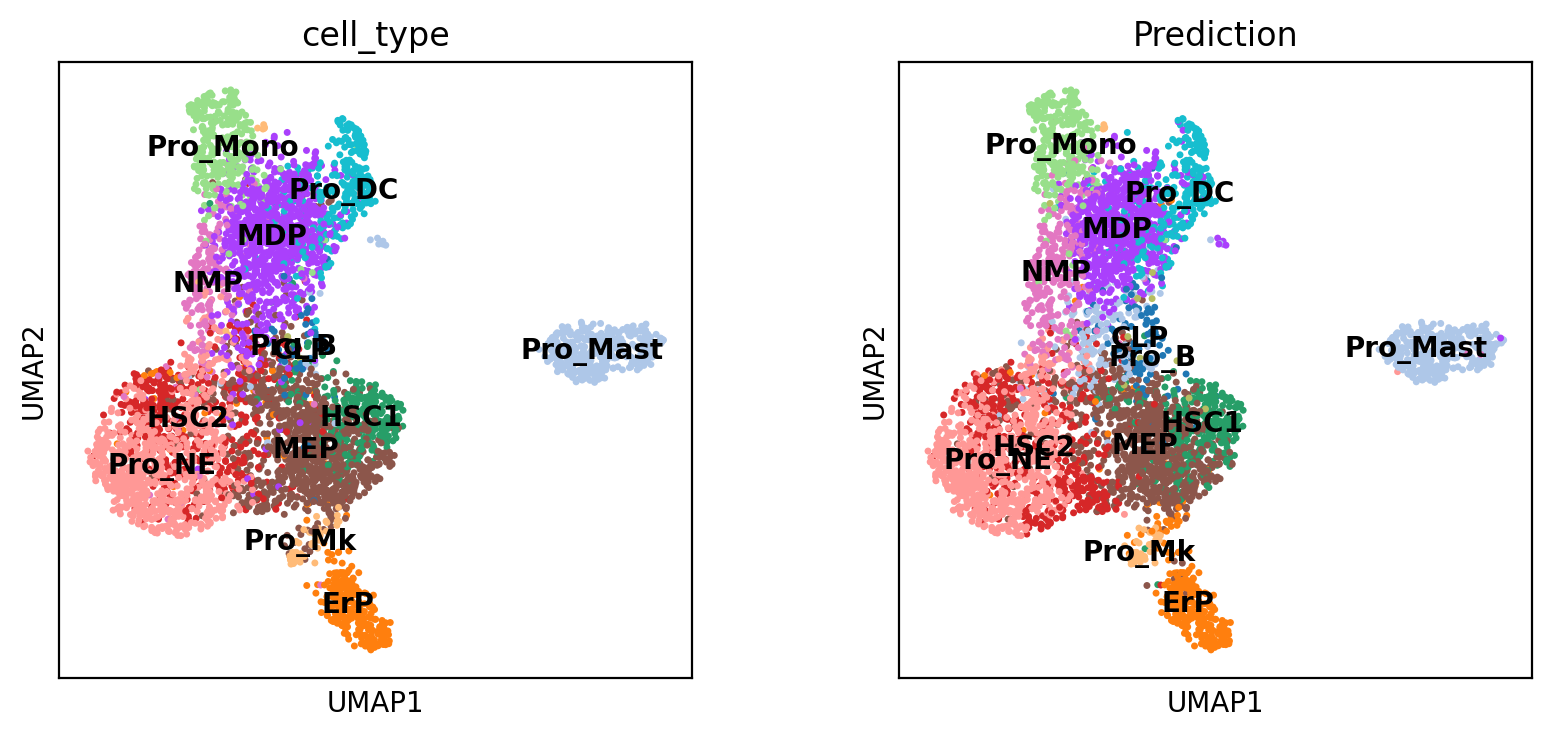

In [37]:
new_adata.raw = new_adata
sc.pp.normalize_total(new_adata, target_sum=1e4)
sc.pp.log1p(new_adata)
sc.pp.scale(new_adata, max_value=10)
sc.tl.pca(new_adata, svd_solver='arpack')
sc.pp.neighbors(new_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(new_adata)
sc.pl.umap(new_adata, color=['cell_type', 'Prediction'],legend_loc='on data')

In [38]:
palette = {"CLP":"#FED439FF",
         "ErP":"#709AE1FF",
         "HSC1":"#8A9197FF",
         "HSC2":"blue",
         "MDP":"#FD7446FF",
         "MEP":"#197EC0FF", 
         "NMP":"#D2AF81FF",
         "Pro_B":"#71D0F5FF",
         "Pro_DC":"#370335FF",
         "Pro_Mast":"#075149FF",
         "Pro_Mk":"#C80813FF",
         "Pro_Mono":"#91331FFF",
         "Pro_NE":"#1A9993FF"}

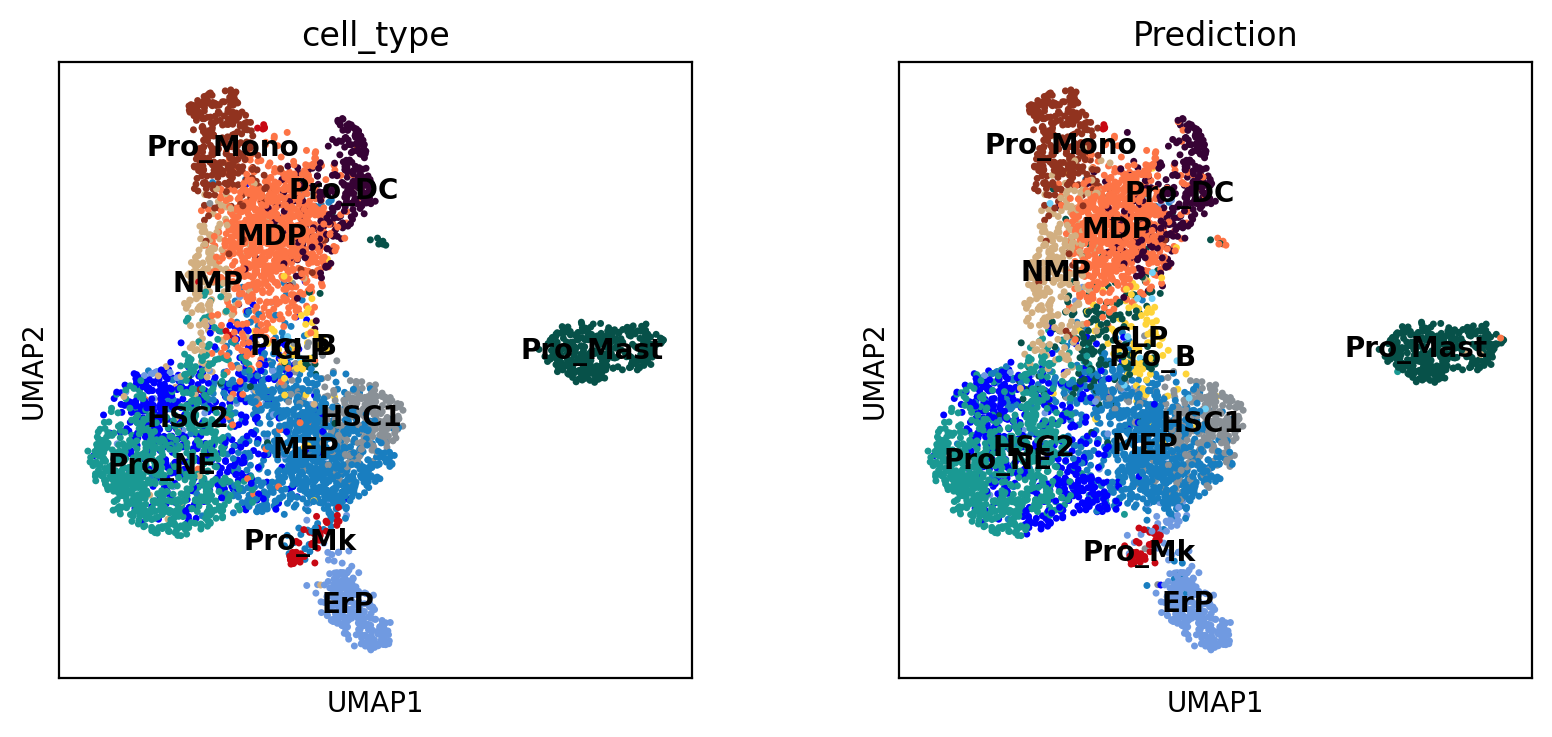

In [39]:
sc.pl.umap(new_adata, color=['cell_type', 'Prediction'],legend_loc='on data', palette=palette)

In [40]:
new_adata.obs['Prediction']

barcode
ACCACGATGAACGCTTGTTCATGG_3    Pro_Mast
ACTCCATCAGGAGGAAAGGATGGT_3        HSC2
AGAACGAGAAGGACACGTCTAGGT_3    Pro_Mast
CCGTAAGAAGTCTGTGAGGCATAG_3         MEP
GATTACCGCTCATTGCTGCGTAGA_3    Pro_Mast
                                ...   
ATATGCGCAATGGACGTGTCCAGA_3      Pro_NE
GAGACGATGAAGAGGTTTCAGCCT_3         ErP
GCTATCCTTCCGTATGTGGTCCTT_3      Pro_NE
GATCGAGTGAGGACTTTCGTGGAT_3         ErP
AAGCACTGGATGCACTCTAACTCG_3         ErP
Name: Prediction, Length: 4793, dtype: category
Categories (13, object): ['CLP', 'ErP', 'HSC1', 'HSC2', ..., 'Pro_Mast', 'Pro_Mk', 'Pro_Mono', 'Pro_NE']

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

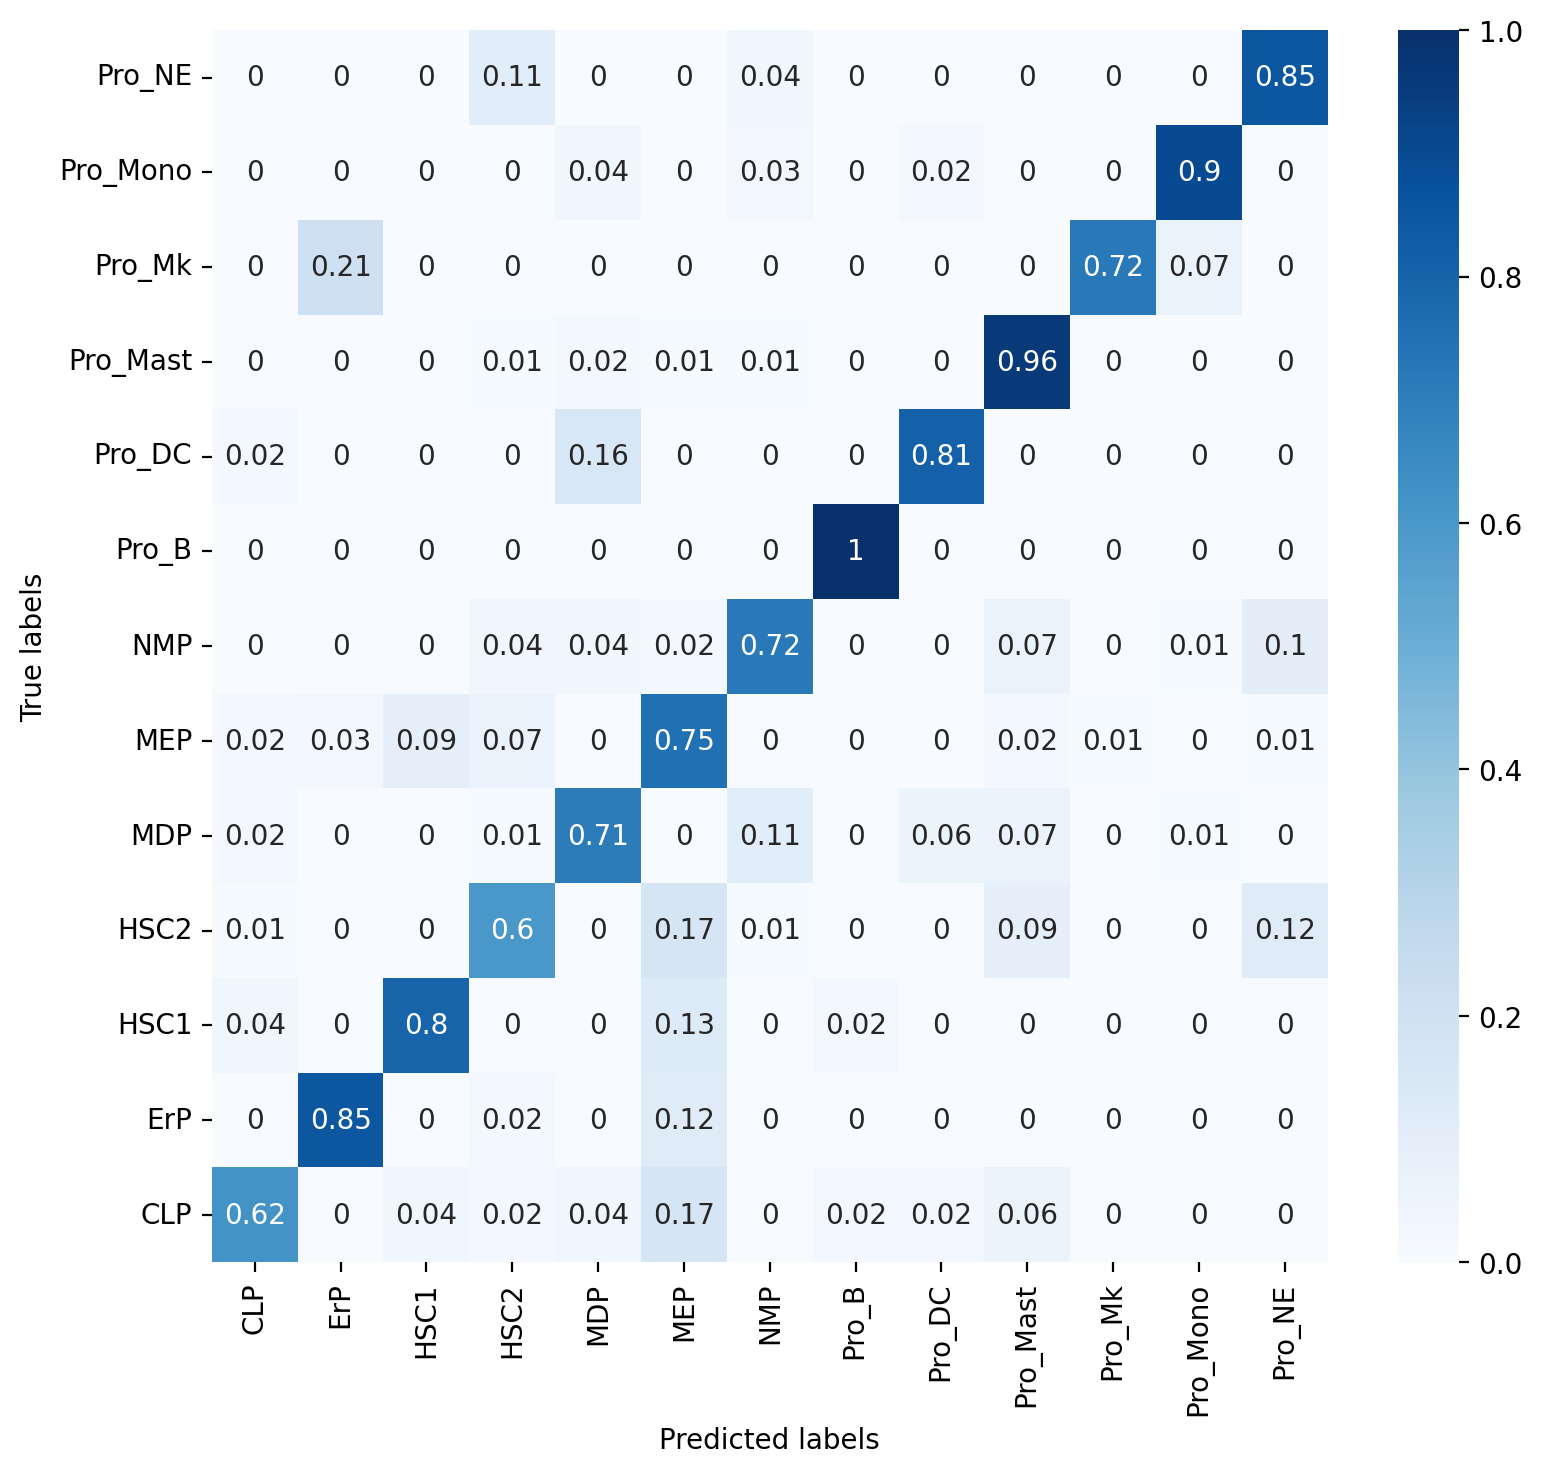

In [42]:
# plotting confusion matrix ### WT
df = new_adata.obs
con_mat = confusion_matrix(df['cell_type'],df['Prediction'])
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=2)
con_mat_norm = pd.DataFrame(con_mat_norm,
                   index=["CLP", "ErP", "HSC1", "HSC2", "MDP", "MEP", "NMP","Pro_B", "Pro_DC", "Pro_Mast","Pro_Mk",  "Pro_Mono","Pro_NE" ],
                   columns=["CLP", "ErP", "HSC1", "HSC2", "MDP", "MEP", "NMP","Pro_B", "Pro_DC", "Pro_Mast","Pro_Mk",  "Pro_Mono","Pro_NE" ])
# === plot ===
# === plot ===
plt.figure(figsize=(9, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')
plt.ylim(0, 13)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [44]:
## 重新排序
order = ["HSC1", 
                                                  "CLP",
                                                  "MEP",
                                                  "HSC2", 
                                                  "MDP", 
                                                  "NMP",
                                                  "Pro_NE",
                                                  "Pro_Mono",
                                                  "Pro_Mast",
                                                  "Pro_DC",
                                                  "Pro_Mk",
                                                  "ErP",
                                                  "Pro_B"] 
con_mat_norm =con_mat_norm.loc[order,:]
con_mat_norm = con_mat_norm.loc[:,order]
con_mat_norm

,HSC1,CLP,MEP,HSC2,MDP,NMP,Pro_NE,Pro_Mono,Pro_Mast,Pro_DC,Pro_Mk,ErP,Pro_B
HSC1,0.80,0.04,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
CLP,0.04,0.62,0.17,0.02,0.04,0.00,0.00,0.00,0.06,0.02,0.00,0.00,0.02
MEP,0.09,0.02,0.75,0.07,0.00,0.00,0.01,0.00,0.02,0.00,0.01,0.03,0.00
HSC2,0.00,0.01,0.17,0.60,0.00,0.01,0.12,0.00,0.09,0.00,0.00,0.00,0.00
MDP,0.00,0.02,0.00,0.01,0.71,0.11,0.00,0.01,0.07,0.06,0.00,0.00,0.00
NMP,0.00,0.00,0.02,0.04,0.04,0.72,0.10,0.01,0.07,0.00,0.00,0.00,0.00
Pro_NE,0.00,0.00,0.00,0.11,0.00,0.04,0.85,0.00,0.00,0.00,0.00,0.00,0.00
Pro_Mono,0.00,0.00,0.00,0.00,0.04,0.03,0.00,0.90,0.00,0.02,0.00,0.00,0.00
Pro_Mast,0.00,0.00,0.01,0.01,0.02,0.01,0.00,0.00,0.96,0.00,0.00,0.00,0.00
Pro_DC,0.00,0.02,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.81,0.00,0.00,0.00


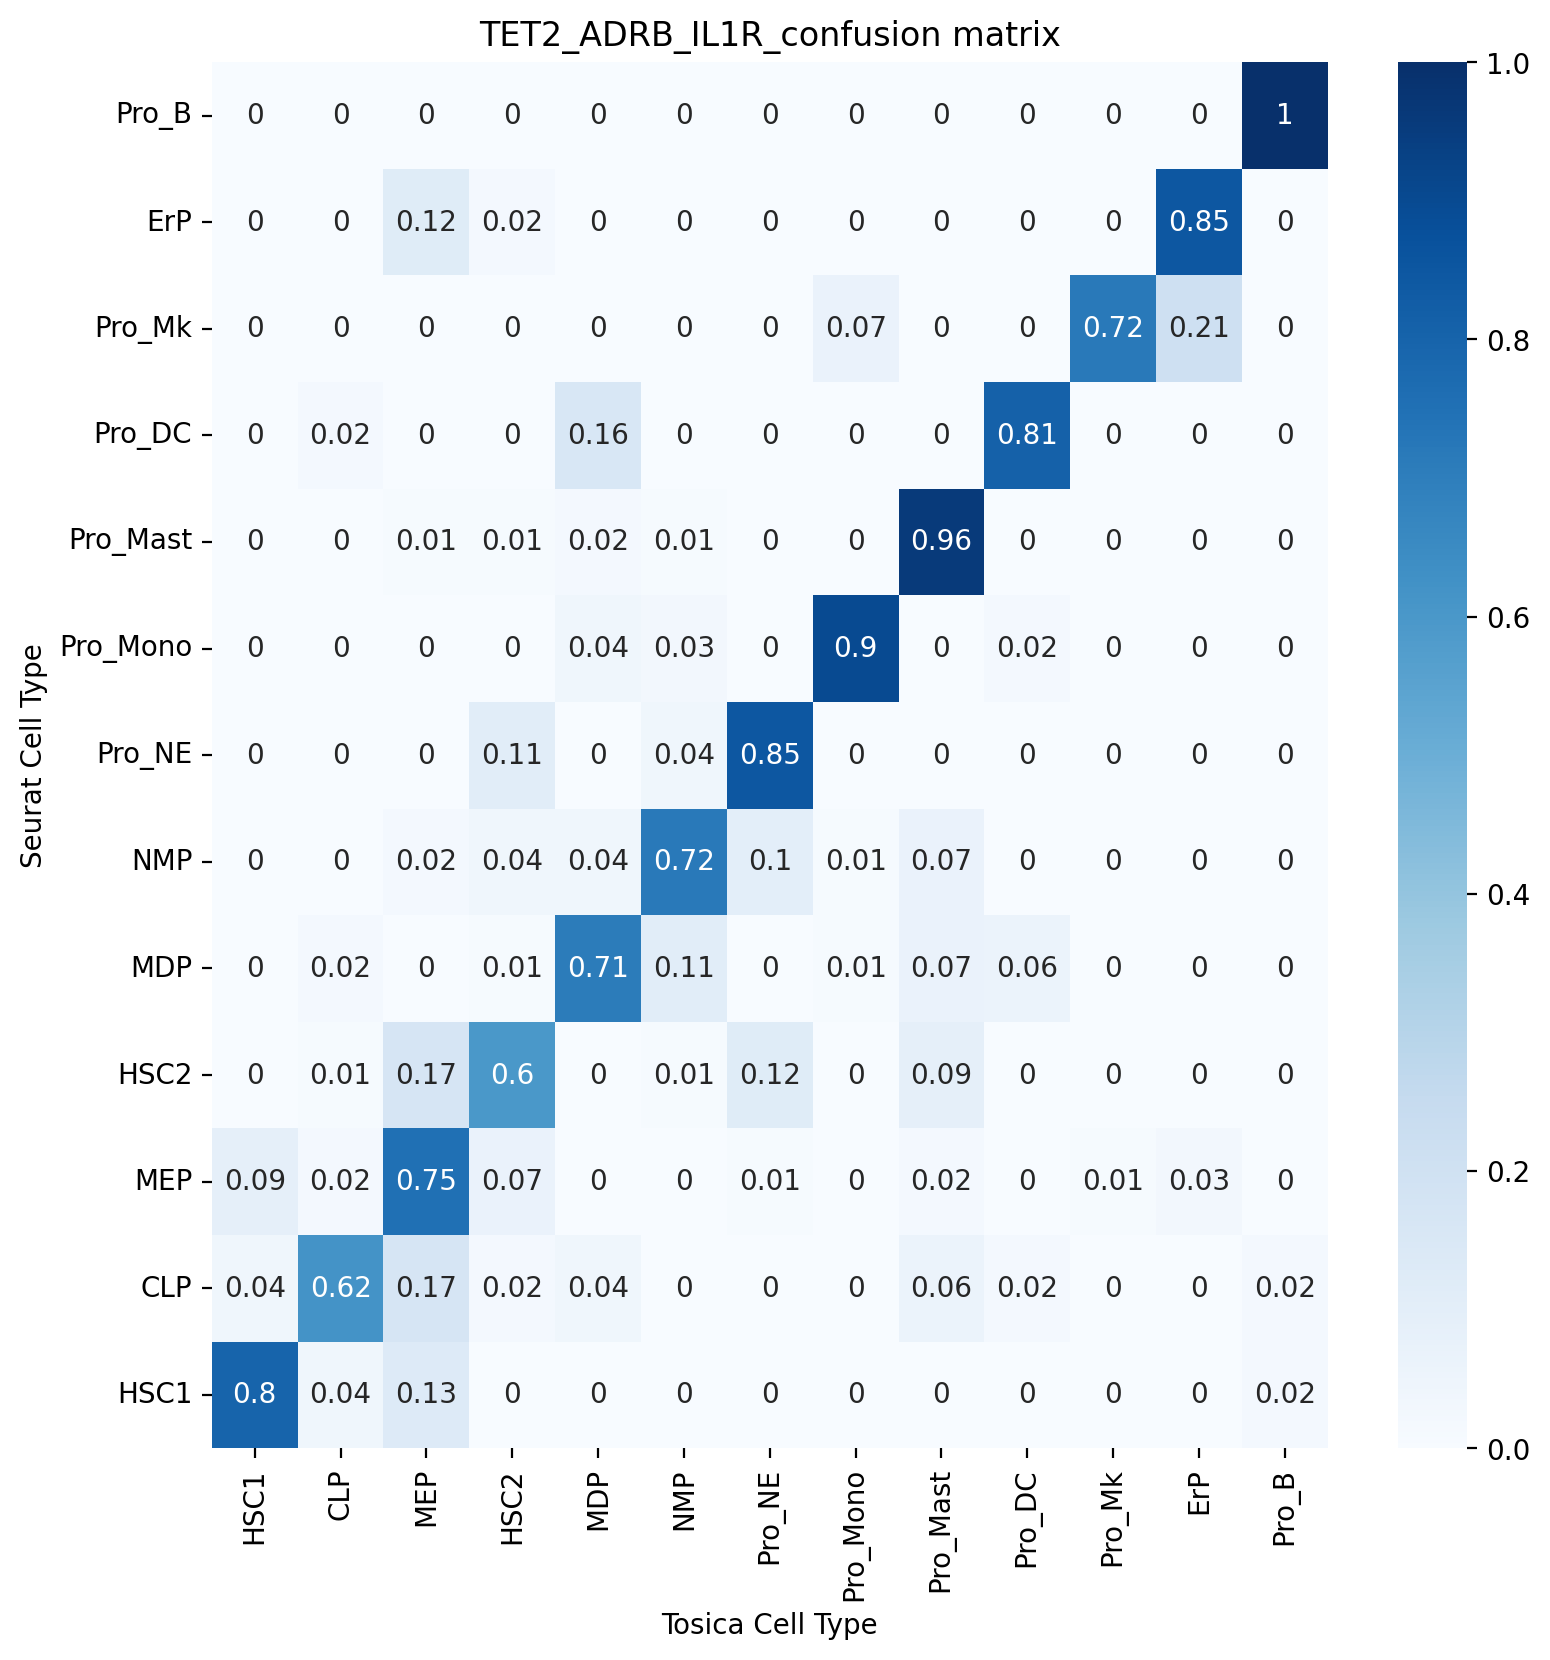

In [45]:
## 重新画图
#right one 2024-01-08 Cai Lab
plt.figure(figsize=(9, 9))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')
plt.ylim(0, 13)
plt.xlabel('Tosica Cell Type')
plt.ylabel('Seurat Cell Type')
plt.title("TET2_ADRB_IL1R_confusion matrix")
plt.savefig("TET2_ADRB_IL1R_confusion matrix.pdf")
plt.show()